In [1]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union
import json

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from image import Image, Point
from function import *
from dsl import *

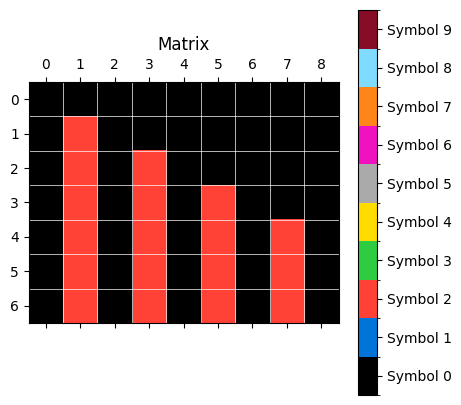

In [2]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/ce9e57f2.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
img_mask.shape
input_img= Image(0,0,9,7,img_mask)
display_matrix(input_img)

In [3]:
# [display_matrix(half(input_img,i)) for i in range(4)]

In [4]:
# img_l = list_components(input_img)
# [display_matrix(half(i[0],2)) for i in img_l]

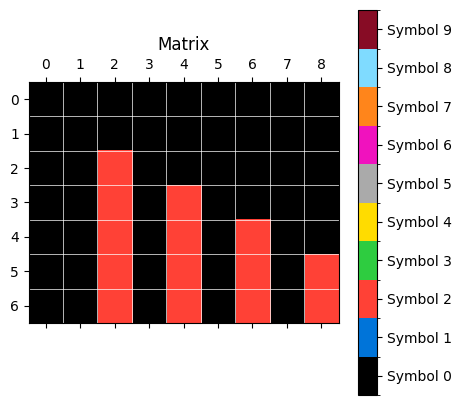

In [5]:
display_matrix(move(input_img,(1,1)))

In [6]:
data_ce9["train"][0]["input"],data_ce9["train"][0]["output"]

([[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 0, 2, 0, 0, 0, 0, 0],
  [0, 2, 0, 2, 0, 2, 0, 0, 0],
  [0, 2, 0, 2, 0, 2, 0, 2, 0],
  [0, 2, 0, 2, 0, 2, 0, 2, 0],
  [0, 2, 0, 2, 0, 2, 0, 2, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 0, 0, 0, 0, 0, 0, 0],
  [0, 2, 0, 2, 0, 0, 0, 0, 0],
  [0, 2, 0, 2, 0, 2, 0, 0, 0],
  [0, 8, 0, 2, 0, 2, 0, 2, 0],
  [0, 8, 0, 8, 0, 8, 0, 2, 0],
  [0, 8, 0, 8, 0, 8, 0, 8, 0]])

In [7]:
x = np.array(data_ce9["train"][0]["input"])
x[3:7,1:3]

array([[2, 0],
       [2, 0],
       [2, 0],
       [2, 0]])

In [8]:
x[3+2:7+2,1+2:3+2]

array([[2, 0],
       [2, 0]])

In [9]:
import numpy as np

def move_submatrix(matrix, shift, top_left, bottom_right):
    result = matrix.copy()
    x1, y1 = top_left
    x2, y2 = bottom_right
    submatrix = matrix[x1:x2+1, y1:y2+1]

    shift_x, shift_y = shift
    shifted_submatrix = np.zeros_like(submatrix)

    if shift_x > 0:
        shifted_submatrix[shift_x:, :] = submatrix[:-shift_x, :]
    elif shift_x < 0:
        shifted_submatrix[:shift_x, :] = submatrix[-shift_x:, :]
    else:
        shifted_submatrix[:, :] = submatrix[:, :]

    if shift_y > 0:
        shifted_submatrix[:, shift_y:] = shifted_submatrix[:, :-shift_y]
    elif shift_y < 0:
        shifted_submatrix[:, :shift_y] = shifted_submatrix[:, -shift_y:]
    else:
        shifted_submatrix[:, :] = shifted_submatrix[:, :]

    # Set old positions to zero in the result matrix
    result[x1:x2+1, y1:y2+1] = 0
    # Place the shifted submatrix back into the result matrix
    result[x1:x2+1, y1:y2+1] = shifted_submatrix

    return result

# Initial matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0]
])

# Define the submatrix bounds and the shift
top_left = (1, 1)
bottom_right = (5, 5)
shift = (1, 1)

# Perform the shift
shifted_matrix = move_submatrix(matrix, shift, top_left, bottom_right)
print(shifted_matrix)


[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 2 2 0 0 0 0 0 0]
 [0 2 2 0 2 0 0 0 0]
 [0 2 2 0 2 0 0 2 0]
 [0 2 2 0 2 0 0 2 0]
 [0 2 0 2 0 2 0 2 0]]


In [10]:
input_img.copy()

In [11]:
def apply_to_selected_area_move(self, img: Image, func: Callable[[Image], Image], shift: tuple[int,int]) -> Image:
        if self.selected_area:
            shift_y , shift_x = shift
            x1, y1, x2, y2 = self.selected_area
            result_matrix = img.copy()
            matrix = img.mask
            
            submatrix = matrix[y1:y2, x1:x2]
            
            # Calculate the n"""  """ew top-left position after the shift
            x1_new,y1_new = x1+shift_x,y1 + shift_y
            
            # Define the range for the new position
            x2_new,y2_new = x1_new + submatrix.shape[0] - 1, y1_new+ submatrix.shape[1] - 1
            
            # Clear the original submatrix area
            result_matrix.mask[y1:y2,x1:x2] = 0
            
            # Place the submatrix in the new position
            result_matrix.mask[y1_new:y2_new, x1_new:x2_new] = submatrix
            return result_matrix
            
        
        return func(img)

In [12]:
import numpy as np

def move_submatrix(matrix, shift, top_left, bottom_right):
    # Create a copy of the original matrix to avoid modifying it
    result_matrix = np.copy(matrix)
    
    # Extract the submatrix based on the given bounds
    submatrix = matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    
    # Calculate the new top-left position after the shift
    new_top_left = (top_left[0] + shift[0], top_left[1] + shift[1])
    
    # Define the range for the new position
    new_bottom_right = (new_top_left[0] + submatrix.shape[0] - 1, new_top_left[1] + submatrix.shape[1] - 1)
    
    # Clear the original submatrix area
    result_matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1] = 0
    
    # Place the submatrix in the new position
    result_matrix[new_top_left[0]:new_bottom_right[0]+1, new_top_left[1]:new_bottom_right[1]+1] = submatrix
    
    return result_matrix

# Initial matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0]
])

# Define the submatrix bounds and the shift
top_left = (1, 1)
bottom_right = (5, 5)
shift = (1, 1)

# Perform the shift
shifted_matrix = move_submatrix(matrix, shift, top_left, bottom_right)
print(shifted_matrix)


[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 2 0 2 0 0 0 0]
 [0 0 2 0 2 0 2 2 0]
 [0 0 2 0 2 0 2 2 0]
 [0 2 2 0 2 0 2 2 0]]


In [13]:
input_img.mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0]], dtype=int8)

In [14]:
import numpy as np

def move_submatrix(matrix, shift, top_left, bottom_right):
    # Create a copy of the original matrix to avoid modifying it
    result_matrix = np.copy(matrix)
    
    
    
    # Extract the submatrix based on the given bounds
    submatrix = matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    
    # Calculate the new top-left position after the shift
    new_top_left = (top_left[0] + shift[0], top_left[1] + shift[1])
    
    # Define the range for the new position
    new_bottom_right = (new_top_left[0] + submatrix.shape[0] - 1, new_top_left[1] + submatrix.shape[1] - 1)
    
    # Clear the original submatrix area
    result_matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1] = 0
    
    # Place the submatrix in the new position
    result_matrix[new_top_left[0]:new_bottom_right[0]+1, new_top_left[1]:new_bottom_right[1]+1] = submatrix
    
    return result_matrix

# Initial matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0]
])

# Define the submatrix bounds and the shift
top_left = (1, 1)
bottom_right = (5, 5)
shift = (1, 1)

# Perform the shift
shifted_matrix = move_submatrix(matrix, shift, top_left, bottom_right)
print(shifted_matrix)


[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 2 0 2 0 0 0 0]
 [0 0 2 0 2 0 2 2 0]
 [0 0 2 0 2 0 2 2 0]
 [0 2 2 0 2 0 2 2 0]]


In [15]:
# [[0 0 0 0 0 0 0 0 0]
#  [0 0 0 0 0 0 0 0 0]
#  [0 0 2 0 0 0 0 0 0]
#  [0 0 2 0 2 0 0 0 0]
#  [0 0 2 0 2 0 2 2 0]
#  [0 0 2 0 2 0 2 2 0]
#  [0 2 0 2 0 2 0 2 0]]

In [16]:
shift_y , shift_x = (1,1)
x1, y1, x2, y2 =  1, 4, 2, 7
result = input_img.copy()
matrix = result.mask
# Create a new submatrix with zeros
submatrix = matrix[y1:y2,x1:x2]
print(submatrix)
shifted_submatrix = np.zeros_like(submatrix)

# Calculate the ranges for the new submatrix
start_x = max(0, shift_x)
end_x = submatrix.shape[0] - max(0, -shift_x)
start_y = max(0, shift_y)
end_y = submatrix.shape[1] - max(0, -shift_y)

# Calculate the ranges for the old submatrix
old_start_x = max(0, -shift_x)
old_end_x = submatrix.shape[0] - max(0, shift_x)
old_start_y = max(0, -shift_y)
old_end_y = submatrix.shape[1] - max(0, shift_y)

# Copy the values to the new submatrix
shifted_submatrix[ start_y:end_y,start_x:end_x] = submatrix[ old_start_y:old_end_y,old_start_x:old_end_x]
print(submatrix,shifted_submatrix)
# Zero out the original submatrix positions in the result matrix
result.mask[y1:y2,x1:x2] = 0

# Place the shifted submatrix back into the result matrix
result.mask[y1:y2,x1:x2] = shifted_submatrix
print(result.mask)

[[2]
 [2]
 [2]]
[[2]
 [2]
 [2]] [[0]
 [0]
 [0]]
[[0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 2 0 2 0 0 0 0 0]
 [0 2 0 2 0 2 0 0 0]
 [0 0 0 2 0 2 0 2 0]
 [0 0 0 2 0 2 0 2 0]
 [0 0 0 2 0 2 0 2 0]]


In [17]:
input_img.mask[1:3,:]

array([[0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0, 0]], dtype=int8)

In [18]:

engine = SQLExecutionEngine(input_img)

# sql_commands = """DISPLAY;"""


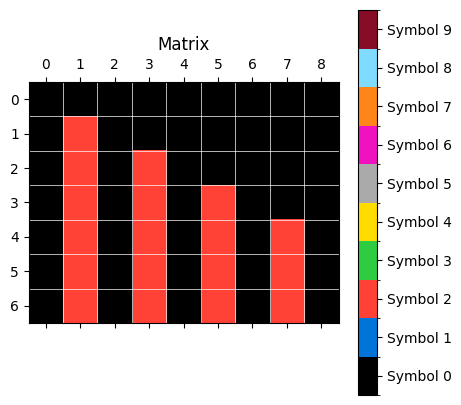

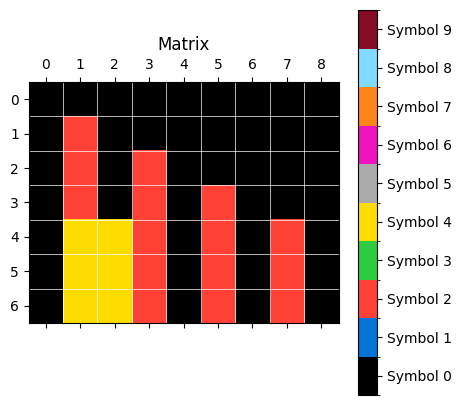

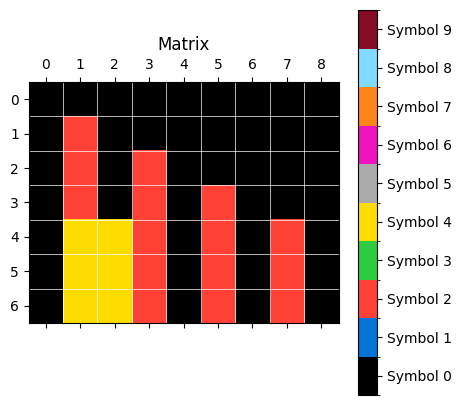

ValueError: could not broadcast input array from shape (1,0) into shape (3,2)

In [19]:

engine = SQLExecutionEngine(input_img)

sql_commands = """
DISPLAY;
SELECT 1 4 3 7;
FILL 4;
DISPLAY;
DISPLAY;
MOVE 1 0;
SHRINK 1;
DISPLAY;
"""

result_image = engine.execute(sql_commands)

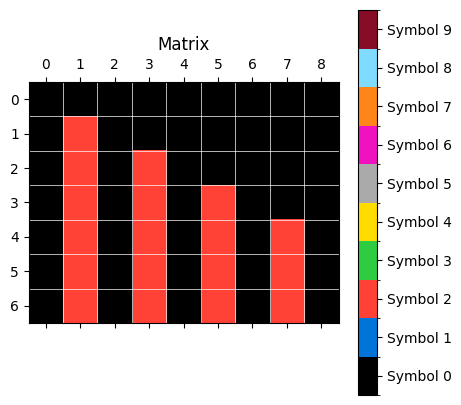

In [ ]:
display_matrix(input_img)

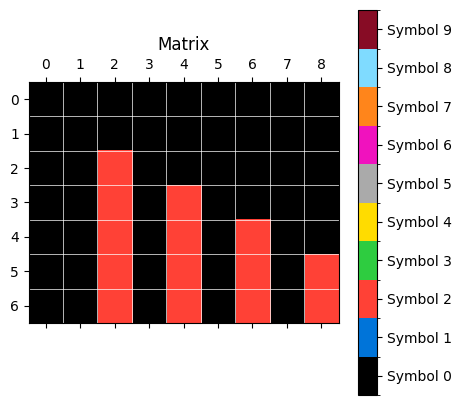

In [ ]:
display_matrix(move(input_img,Point(1,1)))

In [ ]:
def display_matrix_2(matrix):
    colors = [
        "#000000",  # black
        "#0074D9",  # blue
        "#FF4136",  # red
        "#2ECC40",  # green
        "#FFDC00",  # yellow
        "#AAAAAA",  # grey
        "#F012BE",  # fuchsia
        "#FF851B",  # orange
        "#7FDBFF",  # teal
        "#870C25",  # brown
    ]
    cmap = ListedColormap(colors)
    bounds = np.arange(-0.5, 10, 1)
    norm = BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    x,y,w,h = matrix.x,matrix.y,matrix.w,matrix.h
   
    cax = ax.matshow( matrix.mask[x:x+w+1,y:y+h+1], cmap=cmap, norm=norm)
    ax.set_title("Matrix")

    fig.colorbar(
        cax, ax=ax, ticks=np.arange(0, 10), orientation="vertical"
    ).ax.set_yticklabels(
        [
            "Symbol 0",
            "Symbol 1",
            "Symbol 2",
            "Symbol 3",
            "Symbol 4",
            "Symbol 5",
            "Symbol 6",
            "Symbol 7",
            "Symbol 8",
            "Symbol 9",
        ]
    )

    plt.show()

In [ ]:
input_img.x,input_img.y,input_img.w,input_img.h

(0, 0, 9, 7)

In [ ]:
input_img.mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 0, 0, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 0, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0],
       [0, 2, 0, 2, 0, 2, 0, 2, 0]], dtype=int8)

In [ ]:
np.array([[ 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [ 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 0],
       [2, 0, 2, 0, 2, 0, 0, 0, 0],
       [ 2, 0, 2, 0, 2, 0, 2, 0, 0],
       [2, 0, 2, 0, 2, 0, 2, 0, 0],
       [ 2, 0, 2, 0, 2, 0, 2, 0, 0]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0, 0, 0],
       [2, 0, 2, 0, 2, 0, 0, 0, 0],
       [2, 0, 2, 0, 2, 0, 2, 0, 0],
       [2, 0, 2, 0, 2, 0, 2, 0, 0],
       [2, 0, 2, 0, 2, 0, 2, 0, 0]])

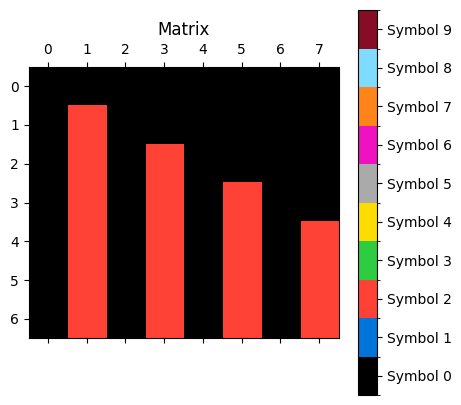

In [ ]:
display_matrix_2(input_img)

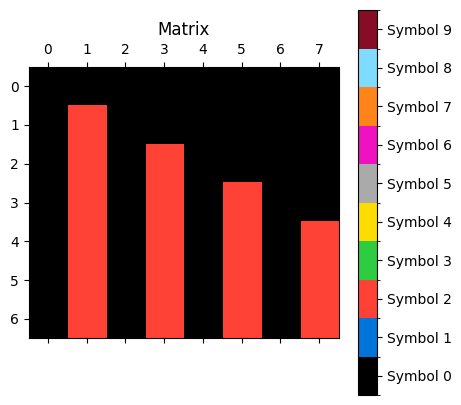

In [ ]:
display_matrix_2(move(input_img,Point(0,0)))

In [ ]:
data_ce9["train"][0]["output"]

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 0, 0, 0, 0, 0, 0],
 [0, 2, 0, 2, 0, 0, 0, 0, 0],
 [0, 2, 0, 2, 0, 2, 0, 0, 0],
 [0, 8, 0, 2, 0, 2, 0, 2, 0],
 [0, 8, 0, 8, 0, 8, 0, 2, 0],
 [0, 8, 0, 8, 0, 8, 0, 8, 0]]

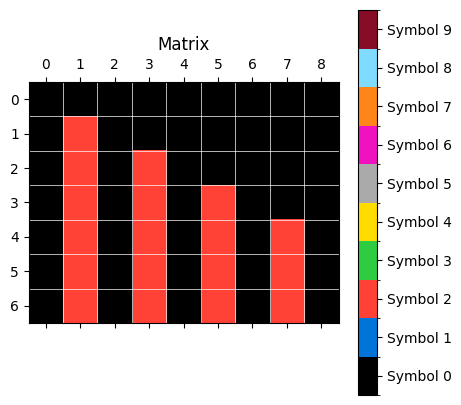

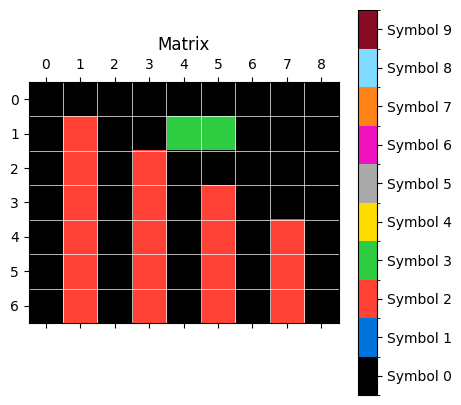

In [ ]:
engine = SQLExecutionEngine(input_img)

sql_commands = """
DISPLAY;
SELECT 4 1 6 2;
FILL 3;
DISPLAY;
"""

result_image = engine.execute(sql_commands)

In [ ]:
# import numpy as np

# def move(matrix, shift):def move(img: Image, p: Image) -> Image:
#     new_img = Image(img.x + p.x,img.x += p.x)
#     img.x += p.x
#     img.y += p.y
#     return img
#     result = np.zeros_like(matrix)
#     result[:, shift:] = matrix[:, :-shift]
#     return result

# # Initial matrix
# matrix = np.array([
#     [0, 0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 2, 0, 0, 0, 0, 0, 0, 0],
#     [0, 2, 0, 2, 0, 0, 0, 0, 0],
#     [0, 2, 0, 2, 0, 2, 0, 0, 0],
#     [0, 2, 0, 2, 0, 2, 0, 2, 0],
#     [0, 2, 0, 2, 0, 2, 0, 2, 0],
#     [0, 2, 0, 2, 0, 2, 0, 2, 0]
# ])

# # Perform the shift
# shifted_matrix = move(matrix, 1)
# print(shifted_matrix)


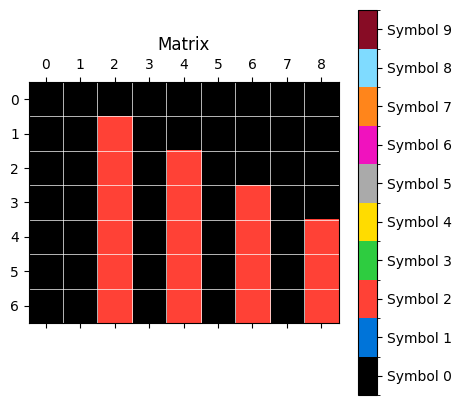

In [ ]:
import numpy as np

def move(img:Image, shift: Tuple[int,int]):
    matrix = img.mask
    result = np.zeros_like(matrix)
    shift_y, shift_x = shift

    if shift_x > 0:
        result[shift_x:, :] = matrix[:-shift_x, :]
    elif shift_x < 0:
        result[:shift_x, :] = matrix[-shift_x:, :]
    else:
        result[:, :] = matrix[:, :]

    if shift_y > 0:
        result[:, shift_y:] = result[:, :-shift_y]
    elif shift_y < 0:
        result[:, :shift_y] = result[:, -shift_y:]
    else:
        result[:, :] = result[:, :]

    return Image(img.x,img.y,img.w,img.h,result)


# Perform the shift
shifted_matrix = move(input_img, (1, 0))
display_matrix(shifted_matrix)


In [ ]:
shifted_matrix = move(matrix, (-1, -1))
print(shifted_matrix)

AttributeError: 'numpy.ndarray' object has no attribute 'mask'

In [ ]:
import numpy as np

def move_submatrix(matrix, shift, top_left, bottom_right):
    result = matrix.copy()
    x1, y1 = top_left
    x2, y2 = bottom_right
    shift_y,shift_x = shift
    
    # Extract the submatrix
    submatrix = matrix[x1:x2+1, y1:y2+1]
    
    # Create a new submatrix with zeros
    shifted_submatrix = np.zeros_like(submatrix)
    
    # Calculate the ranges for the new submatrix
    start_x = max(0, shift_x)
    end_x = submatrix.shape[0] - max(0, -shift_x)
    start_y = max(0, shift_y)
    end_y = submatrix.shape[1] - max(0, -shift_y)
    
    # Calculate the ranges for the old submatrix
    old_start_x = max(0, -shift_x)
    old_end_x = submatrix.shape[0] - max(0, shift_x)
    old_start_y = max(0, -shift_y)
    old_end_y = submatrix.shape[1] - max(0, shift_y)
    
    # Copy the values to the new submatrix
    shifted_submatrix[start_x:end_x, start_y:end_y] = submatrix[old_start_x:old_end_x, old_start_y:old_end_y]
    
    # Zero out the original submatrix positions in the result matrix
    result[x1:x2+1, y1:y2+1] = 0
    
    # Place the shifted submatrix back into the result matrix
    result[x1:x2+1, y1:y2+1] = shifted_submatrix
    
    return result

# Initial matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 4, 0, 2, 0, 2, 0, 2, 0],
    [0, 4, 0, 2, 0, 2, 0, 2, 0]
])

# Define the submatrix bounds and the shift
top_left = (1, 1)
bottom_right = (5, 5)
shift = (1, 0)

# Perform the shift
shifted_matrix = move_submatrix(matrix, shift, top_left, bottom_right)
print(shifted_matrix)


In [ ]:
import numpy as np

def move_submatrix(matrix, shift, top_left, bottom_right):
    # Create a copy of the original matrix to avoid modifying it
    result_matrix = np.copy(matrix)
    
    # Extract the submatrix based on the given bounds
    submatrix = matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1]
    
    # Calculate the new top-left position after the shift
    new_top_left = (top_left[0] + shift[0], top_left[1] + shift[1])
    
    # Define the range for the new position
    new_bottom_right = (new_top_left[0] + submatrix.shape[0] - 1, new_top_left[1] + submatrix.shape[1] - 1)
    
    # Clear the original submatrix area
    result_matrix[top_left[0]:bottom_right[0]+1, top_left[1]:bottom_right[1]+1] = 0
    
    # Place the submatrix in the new position
    result_matrix[new_top_left[0]:new_bottom_right[0]+1, new_top_left[1]:new_bottom_right[1]+1] = submatrix
    
    return result_matrix

# Initial matrix
matrix = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 0, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 0, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0],
    [0, 2, 0, 2, 0, 2, 0, 2, 0]
])

# Define the submatrix bounds and the shift
top_left = (2, 1)
bottom_right = (5, 5)
shift = (1, 1)

# Perform the shift
shifted_matrix = move_submatrix(matrix, shift, top_left, bottom_right)
print(shifted_matrix)
